In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_columns = 1000
random_state = 42

In [9]:
def plot_accuracy( history ):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize = (12, 6))
    plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

def plot_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.figure(figsize = (12, 6))
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'b', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend()
          

### Read data From Files

In [10]:
def get_data_from_files(dir):
    labels = []
    texts = []

    for label_type in ['neg', 'pos']:
        dir_name = os.path.join(dir, label_type)
        for fname in os.listdir(dir_name):
           if fname[-4:] == '.txt':         
              f = open(os.path.join(dir_name, fname), encoding="utf8")
              texts.append(f.read())
              f.close()
           if label_type == 'neg':
               labels.append(0)
           else:
                labels.append(1)
    return texts, labels

#### Read Training data

In [15]:
imdb_dir = 'C:\\Users\\I056036\\Documents\\Docs\\Development\\Tutorials\\Keras\\IMDB_RNN_RAW\\aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
train_texts, train_labels = get_data_from_files(train_dir) 
print('Train Text size {}, Train Labels Size {}'.format(len(train_texts), len(train_labels)))     

Train Text size 25000, Train Labels Size 25000


#### Read test Data

In [16]:
test_dir = os.path.join(imdb_dir, 'test')
test_texts, test_labels = get_data_from_files(test_dir)
print('Test Text size {}, Test Labels Size {}'.format(len(test_texts), len(test_labels)))  

Test Text size 25000, Test Labels Size 25000


In [17]:
train_texts[:3]

["Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.",
 "Airport '77 starts as a brand new luxury 747 plane is loaded up with valuable paintings & such belonging to rich businessman Philip Stevens (James Stewart) who is flying them & a bunch of VIP's to his estate in preparation of it being opened to the public as a museum, also on board is Stevens daughter Julie (Kathleen Quinlan) & her son.

In [18]:
train_labels[:3]

[0, 0, 0]

### Toekenize Raw Data

In [19]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

maxlen = 1000   #Review lenght in words
training_samples = 15000 #Number of samples to train on
validation_samples = 10000
max_words = 20000 #top number of words in sample

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(train_texts)
sequences = tokenizer.texts_to_sequences(train_texts) # Craete a numneric array for text array
word_index = tokenizer.word_index  #Mapping of all word to number ignoring num_words
print('Found %s unique token' % len(word_index))

train_data = np.array(sequences)
print('Data shape', train_data.shape)

train_data[:3]

C:\Users\I056036\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Found 88582 unique token
Data shape (25000,)


array([list([62, 4, 3, 129, 34, 44, 7576, 1414, 15, 3, 4252, 514, 43, 16, 3, 633, 133, 12, 6, 3, 1301, 459, 4, 1751, 209, 3, 10785, 7693, 308, 6, 676, 80, 32, 2137, 1110, 3008, 31, 1, 929, 4, 42, 5120, 469, 9, 2665, 1751, 1, 223, 55, 16, 54, 828, 1318, 847, 228, 9, 40, 96, 122, 1484, 57, 145, 36, 1, 996, 141, 27, 676, 122, 1, 13886, 411, 59, 94, 2278, 303, 772, 5, 3, 837, 11037, 20, 3, 1755, 646, 42, 125, 71, 22, 235, 101, 16, 46, 49, 624, 31, 702, 84, 702, 378, 3493, 12997, 2, 16816, 8422, 67, 27, 107, 3348]),
       list([4517, 19499, 514, 14, 3, 3417, 159, 8595, 12998, 1702, 6, 4892, 53, 16, 4518, 5674, 138, 11926, 5, 1023, 4988, 3050, 4519, 588, 1339, 34, 6, 1544, 95, 3, 758, 4, 5, 24, 3513, 8, 10786, 4, 9, 109, 3051, 5, 1, 1067, 14, 3, 4520, 79, 20, 2086, 6, 4519, 574, 2798, 7262, 38, 489, 1, 8595, 301, 122, 14, 4253, 18, 1693, 942, 1, 1702, 6, 6538, 31, 1, 998, 1807, 667, 24, 104, 14896, 15492, 19500, 2602, 485, 34, 3285, 1, 6539, 1048, 43, 16, 2753, 2547, 33, 1340, 5, 2103, 1, 4

In [20]:
print(word_index)

{'pmrc': 51115, 'seafood': 36837, 'arrivals': 43276, 'battalion': 17071, 'begat': 32022, 'cutter': 6777, 'schildkraut': 16101, "rod's": 35568, 'thrashing': 19708, 'highland': 26220, 'freedomofmind': 61178, 'hessling': 37376, 'slezak': 44362, "knb's": 57978, 'advertised': 6175, 'smetimes': 85814, '100min': 44594, 'stockpiled': 66814, 'szabo': 45909, "photo's": 84497, "j'ai": 36855, 'irritatingly': 16618, 'twofold': 38985, "lommel's": 25293, 'disappointingly': 14837, 'chopras': 57701, 'margaret': 3961, 'ramala': 39879, "eikenberry's": 75145, 'reins': 24815, "anime's": 77577, 'alta': 25069, 'scowls': 23485, 'l2': 63920, 'innercity': 84711, 'tindersticks': 86860, 'fallacy': 21173, 'blushed': 49620, "rite'": 64693, 'web': 3895, 'apoplectic': 79194, 'onus': 65746, 'serio': 20691, 'homosexuality': 6194, 'accelerating': 38779, 'knockout': 13879, "kinkade's": 81761, '1896': 28769, 'condensing': 28003, 'raunchiest': 46009, 'condor\x85which': 65425, 'pdvsa': 56595, 'voltage': 22863, 'scharzenfart

#### Tokenize for Test data

In [21]:
sequences = tokenizer.texts_to_sequences(test_texts)
test_data = np.array(sequences)
print('Data shape', test_data.shape)


Data shape (25000,)


### One Hot Encode

In [22]:
def vectorize_sequences(sequences, dimensions = max_words):
#   One hot encode
    results = np.zeros((len(sequences), dimensions))
    for i, sequences in enumerate(sequences):      
        results[i, sequences] = 1
    return results    



In [23]:
X = vectorize_sequences(train_data) 
X_test =  vectorize_sequences(test_data)
print('Train Shape {}, Test Shape{}'.format(X.shape, X_test.shape))
pd.DataFrame(X).head()

Train Shape (25000, 20000), Test Shape(25000, 20000)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,...,19500,19501,19502,19503,19504,19505,19506,19507,19508,19509,19510,19511,19512,19513,19514,19515,19516,19517,19518,19519,19520,19521,19522,19523,19524,19525,19526,19527,19528,19529,19530,19531,19532,19533,19534,19535,19536,19537,19538,19539,19540,19541,19542,19543,19544,19545,19546,19547,19548,19549,19550,19551,19552,19553,19554,19555,19556,19557,19558,19559,19560,19561,19562,19563,19564,19565,19566,19567,19568,19569,19570,19571,19572,19573,19574,19575,19576,19577,19578,19579,19580,19581,19582,19583,19584,19585,19586,19587,19588,19589,19590,19591,19592,19593,19594,19595,19596,19597,19598,19599,19600,19601,19602,19603,19604,19605,19606,19607,19608,19609,19610,19611,19612,19613,19614,19615,19616,19617,19618,19619,19620,19621,19622,19623,19624,19625,19626,19627,19628,19629,19630,19631,19632,19633,19634,19635,19636,19637,19638,19639,19640,19641,19642,19643,19644,19645,19646,19647,19648,19649,19650,19651,19652,19653,19654,19655,19656,19657,19658,19659,19660,19661,19662,19663,19664,19665,19666,19667,19668,19669,19670,19671,19672,19673,19674,19675,19676,19677,19678,19679,19680,19681,19682,19683,19684,19685,19686,19687,19688,19689,19690,19691,19692,19693,19694,19695,19696,19697,19698,19699,19700,19701,19702,19703,19704,19705,19706,19707,19708,19709,19710,19711,19712,19713,19714,19715,19716,19717,19718,19719,19720,19721,19722,19723,19724,19725,19726,19727,19728,19729,19730,19731,19732,19733,19734,19735,19736,19737,19738,19739,19740,19741,19742,19743,19744,19745,19746,19747,19748,19749,19750,19751,19752,19753,19754,19755,19756,19757,19758,19759,19760,19761,19762,19763,19764,19765,19766,19767,19768,19769,19770,19771,19772,19773,19774,19775,19776,19777,19778,19779,19780,19781,19782,19783,19784,19785,19786,19787,19788,19789,19790,19791,19792,19793,19794,19795,19796,19797,19798,19799,19800,19801,19802,19803,19804,19805,19806,19807,19808,19809,19810,19811,19812,19813,19814,19815,19816,19817,19818,19819,19820,19821,19822,19823,19824,19825,19826,19827,19828,19829,19830,19831,19832,19833,19834,19835,19836,19837,19838,19839,19840,19841,19842,19843,19844,19845,19846,19847,19848,19849,19850

### Convert labels to Float array

In [26]:
y = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')
y[:5]

array([0., 0., 0., 0., 0.], dtype=float32)

### Create Validation Set

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.4, random_state = random_state, stratify = y )
print('Train Size{}, Validation Size {}, Test Size'.format(X_train.shape, X_valid.shape, X_test.shape))

Train Size(15000, 20000), Validation Size (10000, 20000), Test Size


### Create NN Models

In [28]:
from keras import models, layers
from keras import losses, metrics, optimizers, regularizers
def get_model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation= 'relu', input_shape = (max_words, )))
    model.add(layers.Dense(16, activation= 'relu'))    
    model.add(layers.Dense(1, activation= 'sigmoid'))
    
   
    model.compile(optimizer= 'rmsprop',
              loss =     'binary_crossentropy',
              metrics = ['acc']            
             
                )
    return model



## Naive Bayes BenchMark

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import  accuracy_score

classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Validation set results
y_pred = classifier.predict(X_valid)
print('Validation Accuracy:', accuracy_score(y_valid, y_pred))

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred))

Validation Accuracy: 0.6922
Test Accuracy: 0.6174


## Train Nueral Network

In [30]:
model = get_model()
history = model.fit( X_train,
                      y_train,
                     epochs = 20,
                     batch_size = 512,
                     validation_data = (X_valid, y_valid)
                     
                    )

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 13s 878us/step - loss: 0.5104 - acc: 0.7953 - val_loss: 0.3845 - val_acc: 0.8822
Epoch 2/20
15000/15000 [==============================] - 7s 494us/step - loss: 0.2964 - acc: 0.9160 - val_loss: 0.2993 - val_acc: 0.8949
Epoch 3/20
15000/15000 [==============================] - 7s 471us/step - loss: 0.2016 - acc: 0.9425 - val_loss: 0.2853 - val_acc: 0.8891
Epoch 4/20
15000/15000 [==============================] - 7s 460us/step - loss: 0.1484 - acc: 0.9575 - val_loss: 0.2683 - val_acc: 0.8933
Epoch 5/20
15000/15000 [==============================] - 7s 456us/step - loss: 0.1116 - acc: 0.9687 - val_loss: 0.2793 - val_acc: 0.8891
Epoch 6/20
15000/15000 [==============================] - 7s 466us/step - loss: 0.0827 - acc: 0.9771 - val_loss: 0.2825 - val_acc: 0.8899
Epoch 7/20
15000/15000 [==============================] - 7s 471us/step - loss: 0.0615 - acc: 0.9855 - val_loss: 0.3110 -

#### Plot Training vs Validation Accuracy/Loss

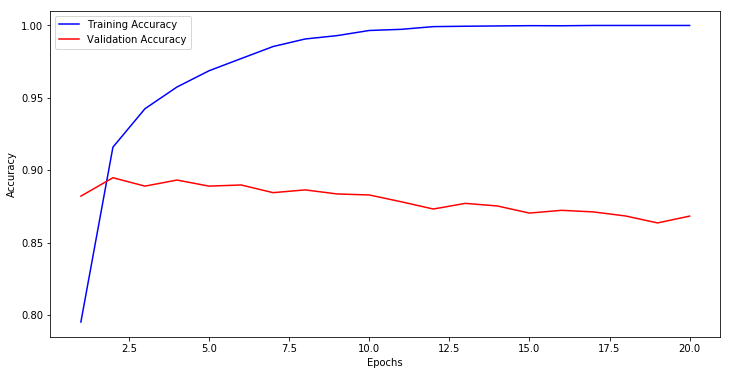

In [31]:
plot_accuracy( history )

In [ ]:
plot_loss( history )

#### Train For Best Epoch

In [32]:
history_dict = history.history
valid_acc = history_dict['val_acc'] 
best_epoch = valid_acc.index(max(valid_acc)) + 1
best_acc =  max(valid_acc)
print('Best Validation Accuracy Score {}, is for epoch {}'.format( best_acc, best_epoch))

Best Validation Accuracy Score 0.894900000667572, is for epoch 2


In [33]:
model = get_model()
history = model.fit( X_train,
                      y_train,
                     epochs = best_epoch,
                     batch_size = 512,
                     validation_data = (X_valid, y_valid)                     
                    )

Train on 15000 samples, validate on 10000 samples
Epoch 1/2
15000/15000 [==============================] - 7s 470us/step - loss: 0.5216 - acc: 0.7865 - val_loss: 0.3834 - val_acc: 0.8803
Epoch 2/2
15000/15000 [==============================] - 7s 457us/step - loss: 0.2904 - acc: 0.9155 - val_loss: 0.2981 - val_acc: 0.8926


#### Predict on test set

In [34]:
results = model.evaluate(X_test, y_test)
print('Test Set Accuracy is',results[1] )

25000/25000 [==============================] - 8s 310us/step
Test Set Accuracy is 0.88264


#### predict on a sample Review of test set

In [37]:
n = 109
print('Actual Rating', y_test[n])
sample_text = test_texts[n:n+2]
sequences = tokenizer.texts_to_sequences(sample_text)
sample_array = np.array(sequences)
X_test_sample =  vectorize_sequences(sample_array)
y_pred = model.predict_classes(X_test_sample)
print('predicted Rating', y_pred[0][0])
sample_text[0]

Actual Rating 0.0
predicted Rating 1


'Enjoy the opening credits. They\'re the best thing about this second-rate but inoffensive time-killer which features passable performances from the likes of Eric Roberts and Martin Kove. The main part, however, goes to newcomer Tommy Lee Thomas who looks a bit diminutive for this kind of action but who, nevertheless, occasionally manages to project a banty-rooster kind of belligerence. The first time we see him he\'s bare-chested, sweaty, and engaged in that favorite "beefcake" activity -- chopping wood. After this he has seven more scenes without his shirt including one in which he\'s hanged by his wrists and zapped with electricity a la Mel Gibson in "Lethal Weapon." He could use a better script, however, since the manner in which he exposes the truth about corruption and violence inside the prison is never very convincing. There\'s also talk about millions of dollars which apparently is tied in with this investigation but which is never explained. There are a few pluses, though. Se